In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import datetime
import spacy
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.matcher import PhraseMatcher
from scipy.sparse import hstack
from scipy import sparse
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Load

In [2]:
data = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_flattened.csv")

In [3]:
data.head()

,job_id,industry_id,salary_id,max_salary_x,med_salary_x,min_salary_x,pay_period_x,currency_x,compensation_type_x,company_name,...,company_size,state,country,city,zip_code_y,address,url,industry,inferred,type
0,3887470552,54,2.0,25.0,NaN,23.0,HOURLY,USD,BASE_SALARY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3884431523,56,3.0,120000.0,NaN,100000.0,YEARLY,USD,BASE_SALARY,Energy Fuels Inc,...,2.0,Colorado,US,Lakewood,80228,225 Union Blvd.,https://www.linkedin.com/company/energy-fuels-...,Mining,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
2,3884911725,12,4.0,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
3,3884911725,17,4.0,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
4,3884911725,15,4.0,200000.0,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN


#### Data Description

In [ ]:
# csv_content = """Column Name,Description,CSV
# job_id,"The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/ job_id)","job_postings.csv"
# company_id,"Identifier for the company associated with the job posting (maps to companies.csv)","job_postings.csv"
# title,"Job title.","job_postings.csv"
# description,"Job description.","job_postings.csv"
# max_salary,"Maximum salary","job_postings.csv"
# med_salary,"Median salary","job_postings.csv"
# min_salary,"Minimum salary","job_postings.csv"
# pay_period,"Pay period for salary (Hourly, Monthly, Yearly)","job_postings.csv"
# formatted_work_type,"Type of work (Fulltime, Parttime, Contract)","job_postings.csv"
# location,"Job location","job_postings.csv"
# applies,"Number of applications that have been submitted","job_postings.csv"
# original_listed_time,"Original time the job was listed","job_postings.csv"
# remote_allowed,"Whether job permits remote work","job_postings.csv"
# views,"Number of times the job posting has been viewed","job_postings.csv"
# job_posting_url,"URL to the job posting on a platform","job_postings.csv"
# application_url,"URL where applications can be submitted","job_postings.csv"
# application_type,"Type of application process (offsite, complex/simple onsite)","job_postings.csv"
# expiry,"Expiration date or time for the job listing","job_postings.csv"
# closed_time,"Time to close job listing","job_postings.csv"
# formatted_experience_level,"Job experience level (entry, associate, executive, etc)","job_postings.csv"
# skills_desc,"Description detailing required skills for job","job_postings.csv"
# listed_time,"Time when the job was listed","job_postings.csv"
# posting_domain,"Domain of the website with application","job_postings.csv"
# sponsored,"Whether the job listing is sponsored or promoted.","job_postings.csv"
# work_type,"Type of work associated with the job","job_postings.csv"
# currency,"Currency in which the salary is provided.","job_postings.csv"
# compensation_type,"Type of compensation for the job.","job_postings.csv"
# job_id,"The job ID","job_details/benefits.csv"
# type,"Type of benefit provided (401K, Medical Insurance, etc)","job_details/benefits.csv"
# inferred,"Whether the benefit was explicitly tagged or inferred through text by LinkedIn","job_details/benefits.csv"
# company_id,"The company ID as defined by LinkedIn","company_details/companies.csv"
# name,"Company name","company_details/companies.csv"
# description,"Company description","company_details/companies.csv"
# company_size,"Company grouping based on number of employees (0 Smallest - 7 Largest)","company_details/companies.csv"
# country,"Country of company headquarters.","company_details/companies.csv"
# state,"State of company headquarters.","company_details/companies.csv"
# city,"City of company headquarters.","company_details/companies.csv"
# zip_code,"ZIP code of company's headquarters.","company_details/companies.csv"
# address,"Address of company's headquarters","company_details/companies.csv"
# url,"Link to company's LinkedIn page","company_details/companies.csv"
# company_id,"The company ID","company_details/employee_counts.csv"
# employee_count,"Number of employees at company","company_details/employee_counts.csv"
# follower_count,"Number of company followers on LinkedIn","company_details/employee_counts.csv"
# time_recorded,"Unix time of data collection","company_details/employee_counts.csv"
# """

# with open("combined_csv.csv", "w", encoding="utf-8") as file:
#     file.write(csv_content)

# print("CSV file saved as combined_csv.csv")


CSV file saved as combined_csv.csv


# EDA


## Initial Exploration

In [10]:
data.drop(['med_salary_x', 'med_salary_y'], axis=1, inplace=True)

In [25]:
data.shape

(45823, 51)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45823 entries, 0 to 45822
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      45823 non-null  int64  
 1   industry_id                 45823 non-null  int64  
 2   salary_id                   45823 non-null  float64
 3   max_salary_x                45823 non-null  float64
 4   min_salary_x                45823 non-null  float64
 5   pay_period_x                45823 non-null  object 
 6   currency_x                  45823 non-null  object 
 7   compensation_type_x         45823 non-null  object 
 8   company_name                40341 non-null  object 
 9   title                       40597 non-null  object 
 10  description_x               40596 non-null  object 
 11  max_salary_y                40597 non-null  float64
 12  pay_period_y                40597 non-null  object 
 13  location                    405

In [6]:
data.describe()


,job_id,industry_id,salary_id,max_salary_x,med_salary_x,min_salary_x,max_salary_y,company_id,views,med_salary_y,...,expiry,closed_time,listed_time,sponsored,normalized_salary,zip_code_x,fips,employee_count,follower_count,company_size
count,4.582300e+04,45823.000000,45823.000000,4.582300e+04,0.0,4.582300e+04,4.059700e+04,4.034200e+04,39958.000000,0.0,...,4.059700e+04,1.670000e+02,4.059700e+04,40597.0,4.059700e+04,31749.000000,29699.000000,40282.000000,4.028200e+04,38098.000000
mean,3.896298e+09,206.457827,20575.054012,9.871696e+04,NaN,6.723654e+04,9.541622e+04,1.196085e+07,22.613219,NaN,...,1.716322e+12,1.713123e+12,1.713230e+12,0.0,2.076901e+05,54943.468739,26007.815549,18939.906182,7.881520e+05,4.629351
std,8.547570e+07,592.064379,11702.892992,5.700863e+05,NaN,4.018271e+05,6.031275e+05,2.559624e+07,143.850539,NaN,...,2.542537e+09,4.121305e+08,3.811077e+08,0.0,4.894051e+06,33659.620724,16667.529900,61960.471365,3.057577e+06,2.134806
min,9.217160e+05,1.000000,2.000000,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.009000e+03,1.000000,NaN,...,1.712954e+12,1.712347e+12,1.712346e+12,0.0,1.000000e+00,1002.000000,1003.000000,0.000000,0.000000e+00,1.000000
25%,3.894918e+09,16.000000,10574.000000,5.332000e+01,NaN,4.100000e+01,5.200000e+01,1.307400e+04,3.000000,NaN,...,1.715487e+12,1.712670e+12,1.712894e+12,0.0,6.136000e+04,21201.000000,8031.000000,123.000000,1.421700e+04,3.000000
50%,3.901986e+09,44.000000,20609.000000,8.640000e+04,NaN,6.500000e+04,8.500000e+04,2.155610e+05,5.000000,NaN,...,1.716045e+12,1.713282e+12,1.713451e+12,0.0,9.260000e+04,60031.000000,26065.000000,1259.500000,7.255250e+04,5.000000
75%,3.904579e+09,96.000000,30557.000000,1.500000e+05,NaN,1.000000e+05,1.450000e+05,6.462746e+06,12.000000,NaN,...,1.716090e+12,1.713451e+12,1.713482e+12,0.0,1.350000e+05,90401.000000,39035.000000,10480.333333,3.515244e+05,7.000000
max,3.906267e+09,3253.000000,40785.000000,1.200000e+08,NaN,8.500000e+07,1.200000e+08,1.034565e+08,9975.000000,NaN,...,1.729125e+12,1.713556e+12,1.713573e+12,0.0,5.356000e+08,99901.000000,56045.000000,748029.500000,3.266054e+07,7.000000


<Axes: >

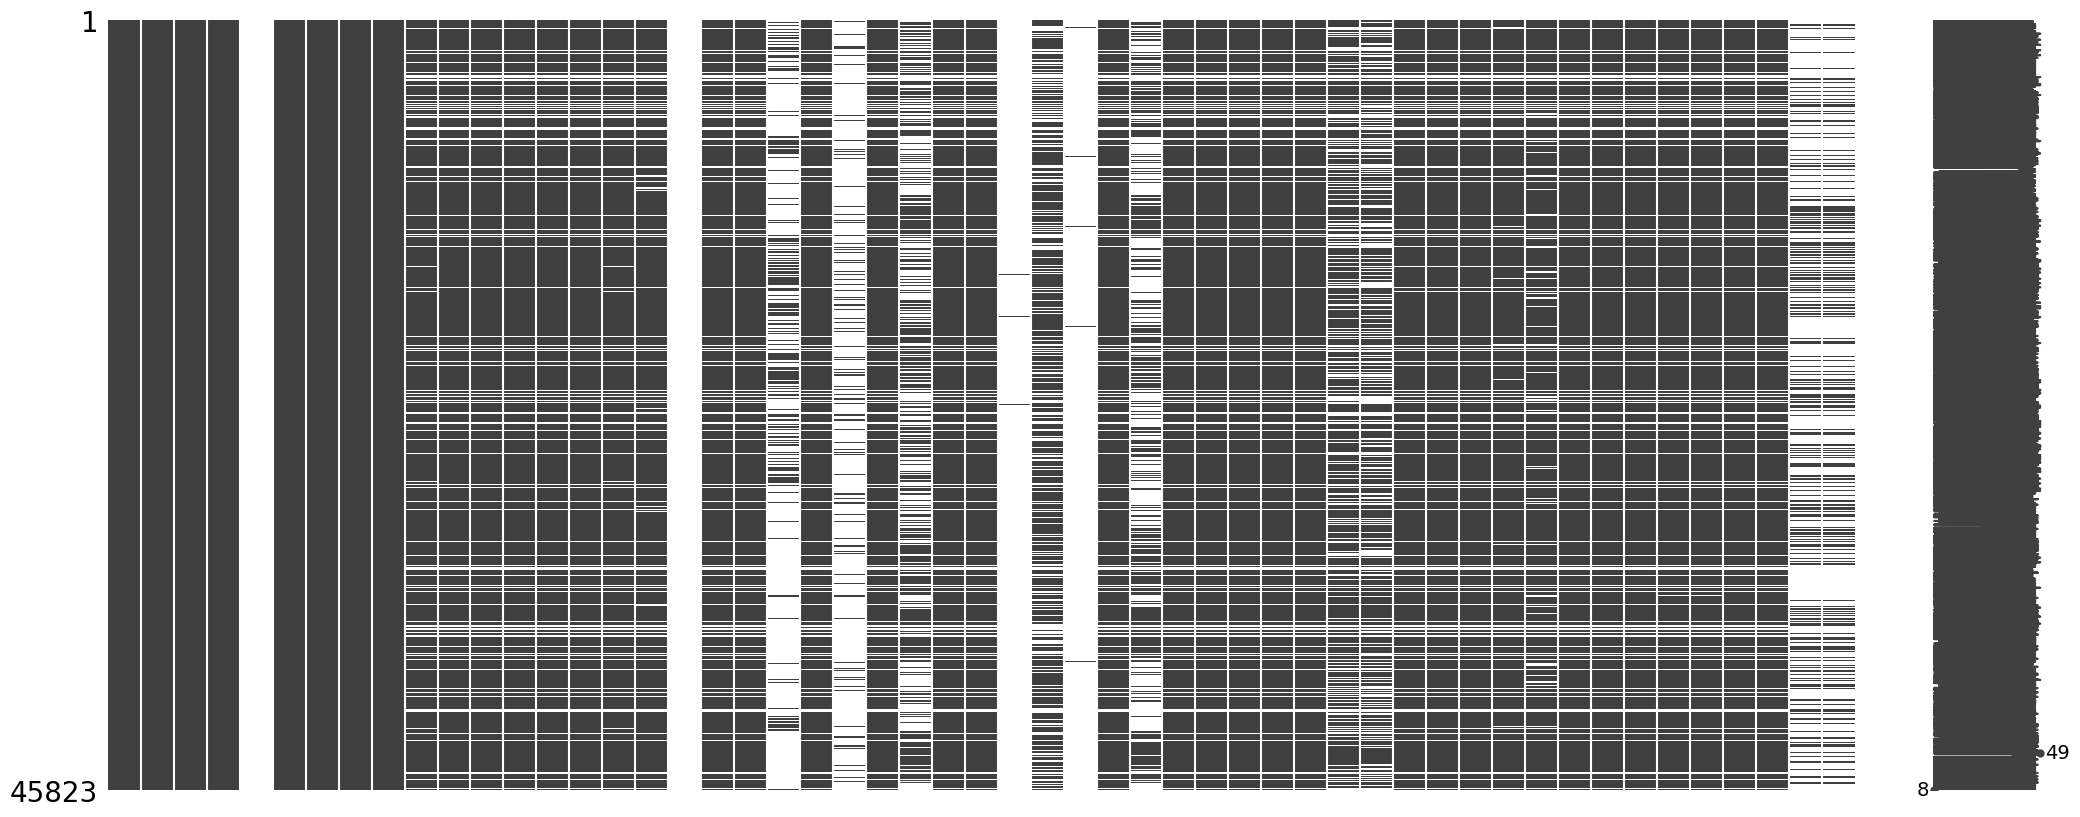

In [5]:
msno.matrix(data)


In [14]:

missing_percentage = (data.isna().sum() / len(data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(inplace=True, ascending=True)
print(missing_percentage)


title                         11.404753
max_salary_y                  11.404753
location                      11.404753
pay_period_y                  11.404753
job_posting_url               11.404753
original_listed_time          11.404753
formatted_work_type           11.404753
min_salary_y                  11.404753
application_type              11.404753
currency_y                    11.404753
normalized_salary             11.404753
compensation_type_y           11.404753
listed_time                   11.404753
sponsored                     11.404753
work_type                     11.404753
expiry                        11.404753
description_x                 11.406935
company_id                    11.961242
company_name                  11.963424
employee_count                12.092181
name                          12.092181
follower_count                12.092181
city                          12.092181
country                       12.092181
industry                      12.092181


In [18]:
# Selecting numerical columns
numerical_columns = data.select_dtypes(include=['int', 'float', 'int64', 'float64', 'uint8', 'int32', 'float32']).columns

# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Unstack the correlation matrix and sort by absolute correlation
correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs.index.get_level_values(0) != correlation_pairs.index.get_level_values(1)]  # Remove self-correlations
correlation_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Select the top 20 highest correlation pairs
top_20_correlations = correlation_pairs.head(30)

# Convert to DataFrame for better visualization
top_20_df = pd.DataFrame(top_20_correlations, columns=['Correlation'])
top_20_df.index.names = ['Feature 1', 'Feature 2']

display(top_20_df)

,,Correlation
Feature 1,Feature 2,
min_salary_x,min_salary_y,1.000000
max_salary_x,max_salary_y,1.000000
max_salary_y,max_salary_x,1.000000
min_salary_y,min_salary_x,1.000000
listed_time,closed_time,0.999937
closed_time,listed_time,0.999937
max_salary_x,min_salary_y,0.997553
min_salary_x,max_salary_y,0.997553
min_salary_y,max_salary_y,0.997553


In [ ]:





columns_na = [
    "formatted_experience_level", "zip_code_x", "fips", "application_url",
    "posting_domain", "inferred", "type", "applies",
    "skills_desc", "closed_time"
]

for i in columns_na:
    print(f"\n\n               {i}\n")
    filtered_data = datatest.dropna(subset=i)
    print(f"Number of rows after removing missing values in {i}: {len(filtered_data)} ({len(filtered_data)/45823*100:.2f}%)")
    display(filtered_data[i].head())

unique currency_x ['USD' 'CAD' 'BBD' 'EUR' 'AUD' 'GBP']
unique pay_period_x ['HOURLY' 'YEARLY' 'MONTHLY' 'WEEKLY' 'BIWEEKLY']


               formatted_experience_level

Number of rows after removing missing values in formatted_experience_level: 31894 (69.60%)


0           Associate
1    Mid-Senior level
2           Associate
3           Associate
4           Associate
Name: formatted_experience_level, dtype: object



               zip_code_x

Number of rows after removing missing values in zip_code_x: 31749 (69.29%)


0    77541.0
2    11550.0
3    11550.0
4    11550.0
9    14733.0
Name: zip_code_x, dtype: float64



               fips

Number of rows after removing missing values in fips: 29699 (64.81%)


0    48039.0
2    36059.0
3    36059.0
4    36059.0
9    36013.0
Name: fips, dtype: float64



               application_url

Number of rows after removing missing values in application_url: 23125 (50.47%)


9     https://skf-jobs.dzconnex.com/job-details/appl...
12                  https://aquent.com/find-work/195013
50    https://mwaa.wd1.myworkdayjobs.com/en-US/MWAA/...
57    https://bmo.wd3.myworkdayjobs.com/en-US/Extern...
58    https://yourlinencompany.isolvedhire.com/jobs/...
Name: application_url, dtype: object



               posting_domain

Number of rows after removing missing values in posting_domain: 20852 (45.51%)


9         skf-jobs.dzconnex.com
57    bmo.wd3.myworkdayjobs.com
66             www.aplitrak.com
67             www.aplitrak.com
68             www.aplitrak.com
Name: posting_domain, dtype: object



               inferred

Number of rows after removing missing values in inferred: 13181 (28.77%)


1        [0, 0, 0, 0]
6     [0, 0, 0, 0, 0]
7     [0, 0, 0, 0, 0]
8     [0, 0, 0, 0, 0]
12       [0, 0, 0, 0]
Name: inferred, dtype: object



               type

Number of rows after removing missing values in type: 13181 (28.77%)


1     ['Medical insurance', 'Vision insurance', 'Den...
6     ['Medical insurance', 'Vision insurance', 'Den...
7     ['Medical insurance', 'Vision insurance', 'Den...
8     ['Medical insurance', 'Vision insurance', 'Den...
12    ['Medical insurance', 'Vision insurance', 'Den...
Name: type, dtype: object



               applies

Number of rows after removing missing values in applies: 11330 (24.73%)


2     1.0
3     1.0
4     1.0
5     1.0
12    5.0
Name: applies, dtype: float64



               skills_desc

Number of rows after removing missing values in skills_desc: 216 (0.47%)


446    Prior residential maintenance experience is pr...
481    \n\nWhat You'll Bring\n\n You must have strong...
688    SYSTEM TESTING , MICROSOFT OFFICE , SOFTWARE D...
814                        jobprofile=Production Manager
815                        jobprofile=Production Manager
Name: skills_desc, dtype: object



               closed_time

Number of rows after removing missing values in closed_time: 167 (0.36%)


332    1.712347e+12
333    1.712347e+12
334    1.712347e+12
764    1.712351e+12
812    1.712353e+12
Name: closed_time, dtype: float64

In [58]:
datafull = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_flattened.csv")
datafull

,job_id,industry_id,salary_id,max_salary_x,med_salary_x,min_salary_x,pay_period_x,currency_x,compensation_type_x,company_name,...,company_size,state,country,city,zip_code_y,address,url,industry,inferred,type
0,3887470552,54,2.0,25.00,NaN,23.0,HOURLY,USD,BASE_SALARY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3884431523,56,3.0,120000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY,Energy Fuels Inc,...,2.0,Colorado,US,Lakewood,80228,225 Union Blvd.,https://www.linkedin.com/company/energy-fuels-...,Mining,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
2,3884911725,12,4.0,200000.00,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
3,3884911725,17,4.0,200000.00,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
4,3884911725,15,4.0,200000.00,NaN,10000.0,YEARLY,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",...,1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45818,3906264345,15,40779.0,50.00,NaN,40.0,HOURLY,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",...,5.0,MA,US,Natick,01760,679 Worcester Street,https://www.linkedin.com/company/talentburst,Staffing and Recruiting,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
45819,3906264345,12,40779.0,50.00,NaN,40.0,HOURLY,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",...,5.0,MA,US,Natick,01760,679 Worcester Street,https://www.linkedin.com/company/talentburst,Staffing and Recruiting,"[0, 0, 0, 0]","['Medical insurance', 'Vision insurance', 'Den..."
45820,3902866633,62,40783.0,21.53,NaN,21.1,HOURLY,USD,BASE_SALARY,Wabtec Corporation,...,7.0,Pennsylvania,US,Pittsburgh,15212,30 Isabella St,https://www.linkedin.com/company/wabtec-corpor...,Railroad Equipment Manufacturing,NaN,NaN
45821,3902879720,27,40784.0,125000.00,NaN,100000.0,YEARLY,USD,BASE_SALARY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning

In [192]:
# datatest = data.copy()

# print(f"unique currency_x {datatest['currency_x'].dropna().unique()}")
# print(f"unique pay_period_x {datatest['pay_period_x'].dropna().unique()}")
# print(f"unique application_type {datatest['application_type'].dropna().unique()}")
# print(f"unique sponsored {datatest['sponsored'].dropna().unique()}")





In [193]:
def clean(data):
    # Drop rows where either 'company_name' or 'title' is missing
    data = data.dropna(subset=['company_name', 'title', 'normalized_salary'])
    
    
    # Fill missing values
    data.loc[:, 'application_type'] = data.loc[:, 'application_type'].fillna('UnknownApply')
    data.loc[:, 'formatted_experience_level'] = data.loc[:, 'formatted_experience_level'].fillna('Other')




    ###########################################################################################################################

    # USD Standardization
    currency_conversion = {
        'USD': 1.0,   # USD to USD (no change)
        'CAD': 0.74,  # 1 CAD = 0.74 USD
        'BBD': 0.50,  # 1 BBD = 0.50 USD
        'EUR': 1.08,  # 1 EUR = 1.08 USD
        'AUD': 0.66,  # 1 AUD = 0.66 USD
        'GBP': 1.26   # 1 GBP = 1.26 USD
    }
    data.loc[:, 'max_salary_in_usd'] = data.loc[:, 'max_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)
    data.loc[:, 'min_salary_in_usd'] = data.loc[:, 'min_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)

    # Standardize pay period to hourly
    pay_period_conversion = {
        'HOURLY': 1,           # No conversion needed
        'YEARLY': 1 / 2080,     # Convert yearly salary to hourly
        'MONTHLY': 1 / 173.33,  # Convert monthly salary to hourly
        'WEEKLY': 1 / 40,       # Convert weekly salary to hourly
        'BIWEEKLY': 1 / 80      # Convert biweekly salary to hourly
    }
    data.loc[:, 'max_hourly_salary_in_usd'] = data.loc[:, 'max_salary_in_usd'] * data.loc[:, 'pay_period_x'].map(pay_period_conversion)
    data.loc[:, 'min_hourly_salary_in_usd'] = data.loc[:, 'min_salary_in_usd'] * data.loc[:, 'pay_period_x'].map(pay_period_conversion)

    ##### DATE TIME CONVERSIONS

    # Convert 'listed_time' (in ms) to datetime and extract date and time
    data.loc[:, 'liteddatetime'] = pd.to_datetime(data.loc[:, 'listed_time'], unit='ms', utc=True)
    data.loc[:, 'ListedDate'] = data.loc[:, 'liteddatetime'].dt.date
    data.loc[:, 'ListedTime'] = data.loc[:, 'liteddatetime'].dt.time
    data.drop(columns=['liteddatetime'], inplace=True)

    # Convert 'expiry' (in ms) to datetime and extract date and time
    data.loc[:, 'expiryddatetime'] = pd.to_datetime(data.loc[:, 'expiry'], unit='ms', utc=True)
    data.loc[:, 'ExpieryDate'] = data.loc[:, 'expiryddatetime'].dt.date
    data.loc[:, 'ExpieryTime'] = data.loc[:, 'expiryddatetime'].dt.time
    data.drop(columns=['expiryddatetime'], inplace=True)

    # Convert 'original_listed_time' (in ms) to datetime and extract date and time
    data.loc[:, 'Originaldatetime'] = pd.to_datetime(data.loc[:, 'original_listed_time'], unit='ms', utc=True)
    data.loc[:, 'OriginalDate'] = data.loc[:, 'Originaldatetime'].dt.date
    data.loc[:, 'OriginalTime'] = data.loc[:, 'Originaldatetime'].dt.time
    data.drop(columns=['Originaldatetime'], inplace=True)


    ###########################################################################################################################
    # Function to ensure each entry is a list.
    def clean_benefits(x):
        if pd.isna(x):
            return []
        # If it's already a list, strip extra quotes from each element.
        if isinstance(x, list):
            return [str(item).strip(" '\"") for item in x]
        # Try to use ast.literal_eval to convert the string to a list.
        try:
            result = ast.literal_eval(x)
            # Ensure the result is a list
            if not isinstance(result, list):
                result = [result]
            return [str(item).strip(" '\"") for item in result]
        except Exception:
            # Fallback: manually remove brackets and extra quotes, then split on commas.
            x = x.strip("[]")
            # Replace duplicate quotes if present.
            x = x.replace("''", "'")
            items = [item.strip(" '\"") for item in x.split(',')]
            return [item for item in items if item]


    # Apply a function (e.g., clean_benefits) to the 'type' column
    data.loc[:, 'type_list'] = data.loc[:, 'type'].apply(clean_benefits)

    # First, print all unique benefit values:
    unique_benefits = set(item for sublist in data['type_list'] for item in sublist)
    print("Unique benefits:", unique_benefits)

    # Next, explode the list into individual rows so each benefit gets its own row.
    exploded = data.explode('type_list')

    # Create dummy variables: 1 if the benefit is present, 0 if not.
    dummies = exploded['type_list'].str.get_dummies()

    # Since exploding creates multiple rows per original record, group by the original index 
    # and take the maximum (so if a benefit appears in any row, it will be 1).
    dummies = dummies.groupby(dummies.index).max()

    # Join the dummy columns back into the original DataFrame.
    data = data.join(dummies)

    # Optionally, drop the original 'type' and temporary 'type_list' columns.
    data.drop(columns=['type', 'type_list'], inplace=True)


    ###########################################################################################################################

    ad0 = ['views', 'applies', 'remote_allowed', 'employee_count', 'company_size' ]
    data[ad0] = data[ad0].fillna(0)




    ###########################################################################################################################
    ##" Dropping columns that are not needed for the analysis"
    
    dropColumns = ['closed_time', 'closed_time', 'expiry', 'listed_time', 'inferred', 'max_salary_y', 'min_salary_y', 'fips', 'original_listed_time']
    drop2 = ['med_salary_x', 'max_salary_x', 'min_salary_x', 'med_salary_y', 'currency_y', 'pay_period_y', 'pay_period_x', 'OriginalDate', 'OriginalTime', 'zip_code_x', 'posting_domain', 'name', 'skills_desc']
    data.drop(columns=dropColumns, inplace=True)
    data.drop(columns=drop2, inplace=True)

    #Extract info from the job_posting_url, posting_domain, description_x

    return data





In [194]:
data = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_flattened.csv")

dataclean = clean(data)

C:\Users\felix\AppData\Local\Temp\ipykernel_22784\3103934898.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'max_salary_in_usd'] = data.loc[:, 'max_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)
C:\Users\felix\AppData\Local\Temp\ipykernel_22784\3103934898.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'min_salary_in_usd'] = data.loc[:, 'min_salary_y'] * data.loc[:, 'currency_x'].map(currency_conversion)
C:\Users\felix\AppData\Local\Temp\ipykernel_22784\31

Unique benefits: {'401(k)', 'Tuition assistance', 'Vision insurance', 'Student loan assistance', 'Dental insurance', 'Medical insurance', 'Paid maternity leave', 'Disability insurance', 'Child care support', 'Pension plan', 'Paid paternity leave', 'Commuter benefits'}


In [195]:
num_rows = dataclean.shape[0]
columns = dataclean.columns
print(f"Number of rows: {num_rows}")

Number of rows: 40341


In [196]:
display(dataclean.head())

,job_id,industry_id,salary_id,currency_x,compensation_type_x,company_name,title,description_x,location,company_id,...,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance
1,3884431523,56,3.0,USD,BASE_SALARY,Energy Fuels Inc,Mine Foreman,GENERAL PURPOSE:Under the general direction of...,Greater Flagstaff Area,947812.0,...,0,1,0,1,0,0,0,0,0,1
2,3884911725,12,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,0,0,0,0,0
3,3884911725,17,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,0,0,0,0,0
4,3884911725,15,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,0,0,0,0,0
5,3887473220,43,5.0,USD,BASE_SALARY,Motion Recruitment,Project Manager,"Our client, a financial services company, is l...","New York, United States",5887.0,...,0,0,0,0,0,0,0,0,0,0


application_url ---> 42.77% missing
description_y ---> 0.71% missing
zip_code_y ---> 0.35% missing
address ---> 0.20% missing
state ---> 0.20% missing
city ---> 0.15% missing
follower_count ---> 0.15% missing
url ---> 0.15% missing
country ---> 0.15% missing
industry ---> 0.15% missing
description_x ---> 0.00% missing


# Text Analytics

In [198]:
#print(dataclean[['description_x', 'description_y']])
# datasample = dataclean.sample(10, random_state=42)

# dataclean = datasample.copy()

In [199]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# --- Step 1: Merge and Preprocess Job Descriptions ---
# Merge the two description columns into one full description
dataclean['full_description'] = dataclean['description_x'].fillna('') + " " + dataclean['description_y'].fillna('')

def clean_text(text):
    """
    Preprocesses text by:
      - Lowercasing and normalizing whitespace.
      - Lemmatizing using spaCy.
      - Keeping only tokens that are NOUN or PROPN.
      - Removing stopwords and non-alphabetic tokens.
    """
    # Lowercase and normalize whitespace
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    
    # Process text with spaCy
    doc = nlp(text)
    # Keep only tokens that are NOUN or PROPN, are alphabetic, and not stopwords
    tokens = [token.lemma_ for token in doc if token.pos_ in ['NOUN', 'PROPN'] and token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

# Create a cleaned version of full_description
dataclean['cleaned_full_description'] = dataclean['full_description'].apply(clean_text)



# --- Step 2: Candidate Keyword Extraction via TF-IDF ---
# Build a TF-IDF model on the cleaned text to capture candidate keywords.
tfidf_vectorizer_candidates = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix_candidates = tfidf_vectorizer_candidates.fit_transform(dataclean['cleaned_full_description'])
feature_names = tfidf_vectorizer_candidates.get_feature_names_out()
tfidf_scores = np.array(tfidf_matrix_candidates.sum(axis=0)).flatten()
tfidf_word_scores = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)

# Define banned words (generic words not representative of specific job assets)
banned_words = [
    "experience", "company", "candidate", "role", "skill", "job", "career",
    "industry", "organization", "people", "work", "business", "community", "year",
    "curino", "rbc", "process", "method", "system", "result", "output", "quality",
    "standard", "support", "report", "metric", "knowledge", "firm", "level", "talent"
]

# Filter out banned words
filtered_tfidf_word_scores = [(word, score) for word, score in tfidf_word_scores if word not in banned_words]

# Select the top 50 candidate keywords from the filtered list
top_n = 50
top_candidates = [word for word, score in filtered_tfidf_word_scores[:top_n]]

# --- Step 3: Extract Explicit Skills/Traits Using a Dictionary-Based Approach ---
# Use the top 50 candidates as the skills list
skills_list = top_candidates

# Initialize PhraseMatcher with the skills list
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
patterns = [nlp.make_doc(skill) for skill in skills_list]
matcher.add("SKILL", patterns)

def extract_skills(text):
    # If desired, you can use 'clean_text(text)' here instead of the original text
    doc = nlp(text)
    matches = matcher(doc)
    skills_found = set()
    for match_id, start, end in matches:
        span = doc[start:end]
        skills_found.add(span.text)
    return list(skills_found)

# Apply the extraction function to each full description.
dataclean['extracted_skills'] = dataclean['full_description'].apply(extract_skills)

# Create binary (dummy) features for each skill in skills_list.
def create_skill_features(text, skills):
    features = {}
    for skill in skills:
        features[skill] = 1 if skill in text else 0
    return features

skill_features = dataclean['full_description'].apply(lambda text: create_skill_features(text, skills_list))
skills_df = pd.DataFrame(skill_features.tolist(), index=dataclean.index)

# --- Step 4: Generate Contextual Features Using TF-IDF ---
# Create a separate TF-IDF representation (with max_features=50) for the full descriptions.
tfidf_vectorizer_context = TfidfVectorizer(max_features=50)
tfidf_features_context = tfidf_vectorizer_context.fit_transform(dataclean['full_description'])

# --- Step 5: Combine Feature Sets ---
# Convert the dummy skills features to a sparse matrix and combine with TF-IDF contextual features.
skills_sparse = sparse.csr_matrix(skills_df.values)
combined_features = hstack([tfidf_features_context, skills_sparse])

# --- Step 6: Append the Combined Features to a New Column ---
# Convert the combined sparse matrix to a dense array and store it as a new column.
combined_features_dense = combined_features.toarray()
dataclean['combined_features'] = list(combined_features_dense)








In [223]:
print(skills_list)

['team', 'client', 'service', 'customer', 'project', 'management', 'product', 'sale', 'employee', 'solution', 'opportunity', 'care', 'health', 'technology', 'time', 'benefit', 'position', 'program', 'development', 'ability', 'datum', 'information', 'engineering', 'staffing', 'status', 'life', 'design', 'world', 'day', 'office', 'accounting', 'range', 'manager', 'employment', 'plan', 'requirement', 'communication', 'application', 'disability', 'environment', 'marketing', 'healthcare', 'insurance', 'patient', 'software', 'location', 'state', 'training', 'market', 'member']


In [200]:


display(dataclean[['full_description', 'extracted_skills', 'combined_features']].head())

,full_description,extracted_skills,combined_features
1,GENERAL PURPOSE:Under the general direction of...,"[accounting, Health, product, Opportunity, pro...","[0.0, 0.023717786689563005, 0.0645417159810364..."
2,Territory Sales Manager - Medical Sales\nMy cl...,"[market, plan, staffing, Opportunity, training...","[0.04253479192415507, 0.06880608563084971, 0.0..."
3,Territory Sales Manager - Medical Sales\nMy cl...,"[market, plan, staffing, Opportunity, training...","[0.04253479192415507, 0.06880608563084971, 0.0..."
4,Territory Sales Manager - Medical Sales\nMy cl...,"[market, plan, staffing, Opportunity, training...","[0.04253479192415507, 0.06880608563084971, 0.0..."
5,"Our client, a financial services company, is l...","[market, Software, product, Project, project, ...","[0.0, 0.05280396464270182, 0.0, 0.543747606719..."


In [201]:
dataclean.columns

Index(['job_id', 'industry_id', 'salary_id', 'currency_x',
       'compensation_type_x', 'company_name', 'title', 'description_x',
       'location', 'company_id', 'views', 'formatted_work_type', 'applies',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'formatted_experience_level', 'sponsored',
       'work_type', 'compensation_type_y', 'normalized_salary',
       'employee_count', 'follower_count', 'description_y', 'company_size',
       'state', 'country', 'city', 'zip_code_y', 'address', 'url', 'industry',
       'max_salary_in_usd', 'min_salary_in_usd', 'max_hourly_salary_in_usd',
       'min_hourly_salary_in_usd', 'ListedDate', 'ListedTime', 'ExpieryDate',
       'ExpieryTime', '401(k)', 'Child care support', 'Commuter benefits',
       'Dental insurance', 'Disability insurance', 'Medical insurance',
       'Paid maternity leave', 'Paid paternity leave', 'Pension plan',
       'Student loan assistance', 'Tuition assistance', 'Vision insu

# URL

In [202]:

# Create binary column 'compappkication'
dataclean.loc[:, 'CompApplication'] = dataclean.apply(
    lambda row: 1 if pd.notnull(row['application_url']) and row['application_url'] != "" and str(row['company_name']).lower() in str(row['application_url']).lower() else 0,
    axis=1
)


CompApplication
0    34580
1     5761
Name: count, dtype: int64


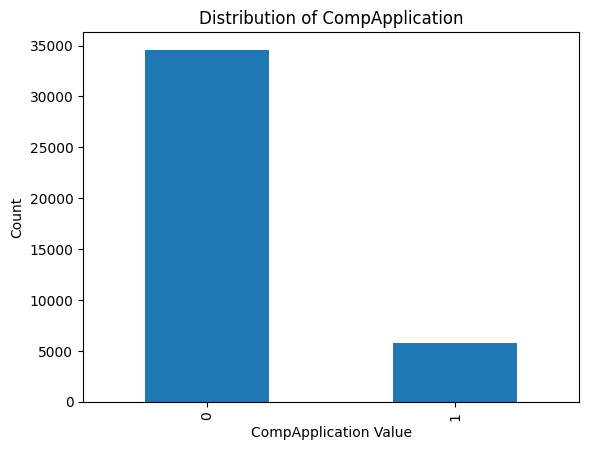

In [203]:

# Print the distribution of unique values
print(dataclean['CompApplication'].value_counts())

# Optionally, plot the distribution as a bar chart
import matplotlib.pyplot as plt

dataclean['CompApplication'].value_counts().plot(kind='bar')
plt.title('Distribution of CompApplication')
plt.xlabel('CompApplication Value')
plt.ylabel('Count')
plt.show()



In [14]:
drop_columns = ['application_url']
dataclean.drop(columns=drop_columns, errors='ignore', inplace=True)


In [17]:
dataclean.dropna(inplace=True)


In [ ]:
#dataclean.to_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_Clean_flattened_cleaned2.csv", index=False)

## Final Load

In [2]:
dataclean = pd.read_csv("C:/Users/felix/OneDrive/McGill Master Work/1 - Winter 25/INSY 695 - Enterprise Data Science/Group Project/Data/final_Clean_flattened_cleaned_Official.csv")

In [3]:
display(dataclean)

,job_id,industry_id,salary_id,currency_x,compensation_type_x,company_name,title,description_x,location,company_id,...,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,full_description,cleaned_full_description,extracted_skills,combined_features,CompApplication
0,3884431523,56,3.0,USD,BASE_SALARY,Energy Fuels Inc,Mine Foreman,GENERAL PURPOSE:Under the general direction of...,Greater Flagstaff Area,947812.0,...,0,0,0,0,1,GENERAL PURPOSE:Under the general direction of...,purpose direction superintendent position vers...,"['accounting', 'Health', 'product', 'Opportuni...",[0. 0.02371779 0.06454172 0.61997699 0...,0
1,3884911725,12,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['market', 'plan', 'staffing', 'Opportunity', ...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,0
2,3884911725,17,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['market', 'plan', 'staffing', 'Opportunity', ...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,0
3,3884911725,15,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,...,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['market', 'plan', 'staffing', 'Opportunity', ...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,0
4,3887473220,43,5.0,USD,BASE_SALARY,Motion Recruitment,Project Manager,"Our client, a financial services company, is l...","New York, United States",5887.0,...,0,0,0,0,0,"Our client, a financial services company, is l...",client service company non project manager tea...,"['market', 'Software', 'product', 'Project', '...",[0. 0.05280396 0. 0.54374761 0...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39953,3906264345,17,40779.0,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I/IILocation: Irvin...,"Irvine, CA",122451.0,...,0,0,0,0,1,Position: Quality Engineer I/IILocation: Irvin...,position quality engineer iilocation irvine mo...,"['Office', 'healthcare', 'opportunity', 'posit...",[0.0275019 0.02224412 0.02017718 0.56383596 0...,0
39954,3906264345,15,40779.0,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I/IILocation: Irvin...,"Irvine, CA",122451.0,...,0,0,0,0,1,Position: Quality Engineer I/IILocation: Irvin...,position quality engineer iilocation irvine mo...,"['Office', 'healthcare', 'opportunity', 'posit...",[0.0275019 0.02224412 0.02017718 0.56383596 0...,0
39955,3906264345,12,40779.0,USD,BASE_SALARY,"TalentBurst, an Inc 5000 company",Quality Engineer,Position: Quality Engineer I/IILocation: Irvin...,"Irvine, CA",122451.0,...,0,0,0,0,1,Position: Quality Engineer I/IILocation: Irvin...,position quality engineer iilocation irvine mo...,"['Office', 'healthcare', 'opportunity', 'posit...",[0.0275019 0.02224412 0.02017718 0.56383596 0...,0
39956,3902866633,62,40783.0,USD,BASE_SALARY,Wabtec Corporation,Warehouse Associate WMS 3W,Wabtec Corporation is a leading global provide...,"Fort Worth, TX",8239496.0,...,0,0,0,0,0,Wabtec Corporation is a leading global provide...,corporation provider equipment system solution...,"['day', 'world', 'customer', 'development', 'e...",[0.04308218 0.05226867 0.01580394 0.55203638 0...,0


In [28]:
dataclean.shape

(39958, 57)

In [29]:
datatest = dataclean.copy()
na_percent = dataclean.isnull().mean() * 100

# Filter columns that have any missing values
na_percent = na_percent[na_percent > 0]

# Print the result, sorted by percentage in descending order
for col, pct in na_percent.sort_values(ascending=False).items():
    print(f"{col} ---> {pct:.2f}% missing")

<Axes: >

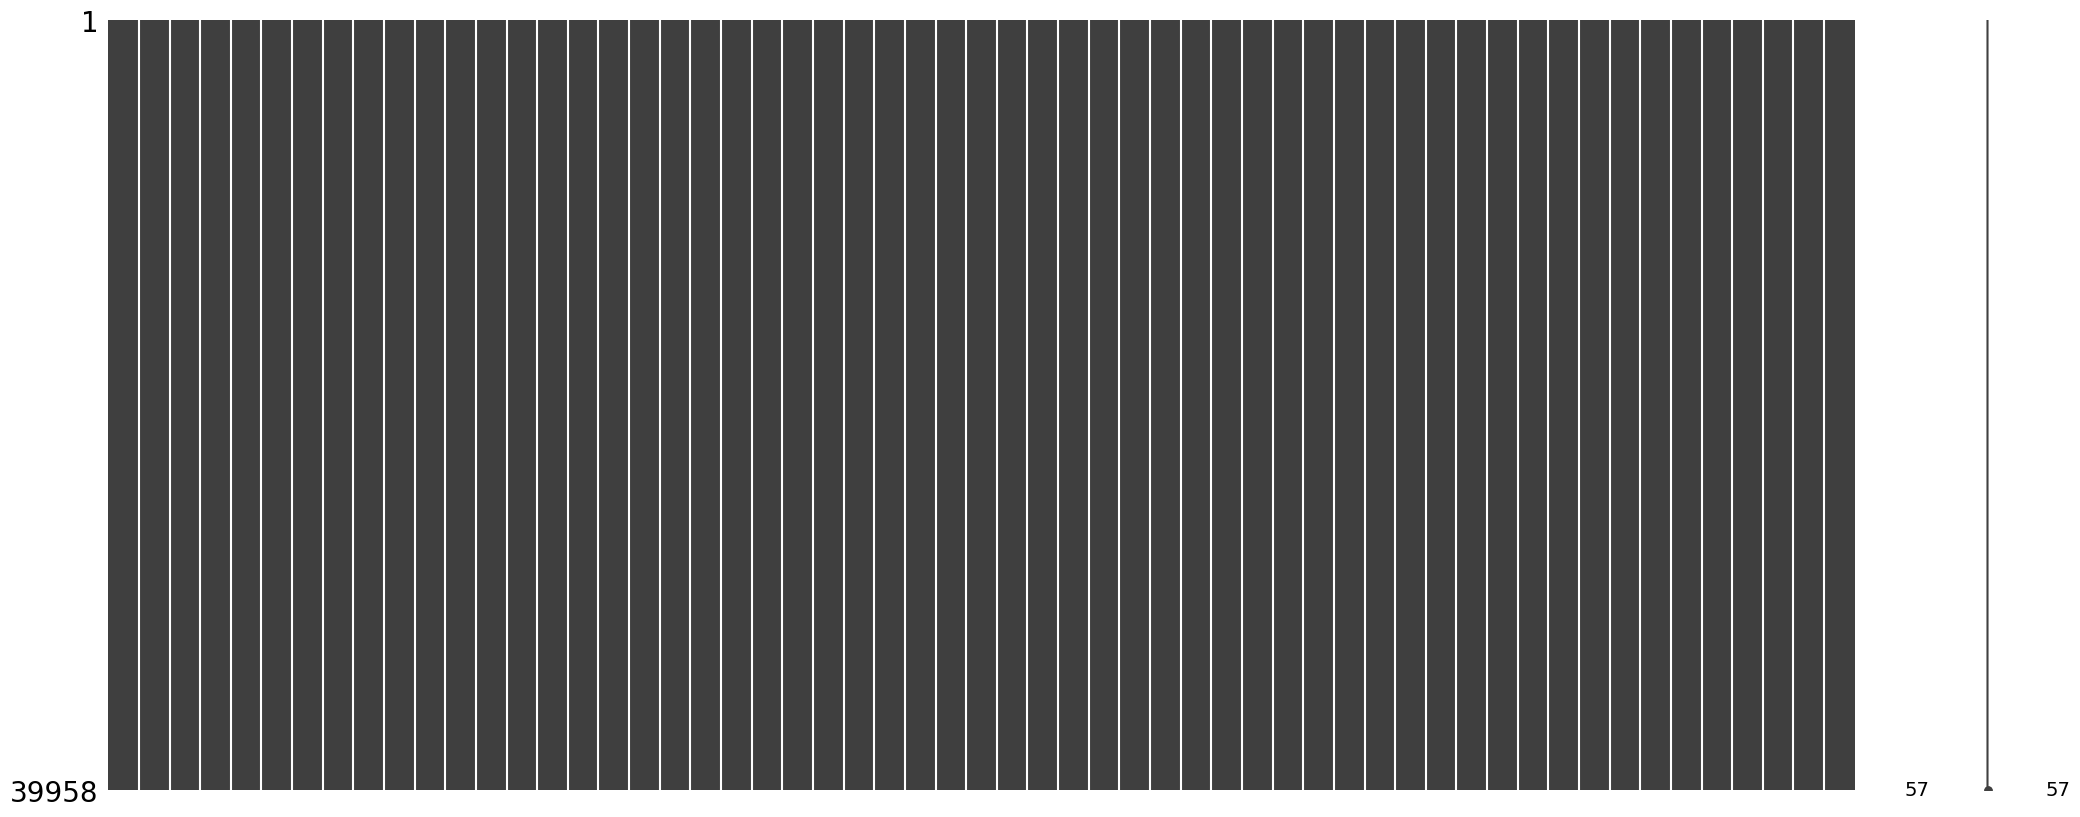

In [30]:
msno.matrix(dataclean)
